In [17]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

userlog_path = "UserLog"
data = []
# pd = {}
vd = {}
auto_note = []
manual_note = []

# for user_folder in os.listdir(userlog_path):
for folder_number in range(1, 13):
    user_folder = f'P{folder_number}'
    print(f'Processing {user_folder}')
    user_data = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        # if folder_number % 2 == 0:
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:

                str_rep = ''
                
                file_path = os.path.join(subdir, file)
                if file == 'onboarding.json':
                    pass
                # if not file.lower().startswith('video1') and not file.lower().startswith('video2'): continue
                elif file.lower().startswith('video1') or file.lower().startswith('video2'):
                    video_data = {}
                    vd_data = {}
                    with open(file_path, 'r', encoding='utf-8') as f:
                        bullet_points_data = json.load(f)
                    video_data['pauseCount'] = bullet_points_data['pauseCount']
                    video_data['forwardCount'] = bullet_points_data['forwardCount']
                    video_data['reverseCount'] = bullet_points_data['reverseCount']
                    video_data['point_count'] = len(bullet_points_data['editHistory'])
                    video_data['expandCount'] = bullet_points_data['buttonStats']['expand_count']
                    video_data['themeCount'] = bullet_points_data['buttonStats']['theme_count']
                    summary_t = bullet_points_data['summary_t']
                    summary_p = bullet_points_data['summary_p']
                    note_points = [
                        {
                            'point': bpd['point'], 
                            'time_taken': bpd['note_taking_time'],
                            'timestamp': bpd['utc_time'],
                            'expanded_note': bpd['edit'][-1][0]['e_point'] if len(bpd['edit']) > 1 else None,
                            'transcript': bpd['fraction_transcript'],
                            'v_id': file.lower()
                        }
                        for bpd in bullet_points_data['editHistory']
                    ]

                    note_points = note_points[1:-1] # discarding first and last noisy point

                    for bpd in bullet_points_data['editHistory']:
                        str_rep += bpd['edit'][-1][0]['e_point']

                    vd_data['p_id'] = user_folder
                    vd_data['note_points'] = note_points
                    vd_data['summary_p'] = summary_p
                    vd_data['summary_t'] = summary_t
                    if folder_number % 2 == 0:
                        if file.lower().startswith('video1'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                            manual_note.append(str_rep)
                        elif file.lower().startswith('video2'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
                            auto_note.append(str_rep)
                    else:
                        if file.lower().startswith('video1'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                            auto_note.append(str_rep)
                        elif file.lower().startswith('video2'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
                            manual_note.append(str_rep)
    data.append(user_data)

Processing P1
Processing P2
Processing P3
Processing P4
Processing P5
Processing P6
Processing P7
Processing P8
Processing P9
Processing P10
Processing P11
Processing P12


In [18]:
author_notee = [None]*12
with open(f'./UserLog/Expansions/UNIQUE_TOPK/user11_no_seed_0.3_temp_1106_model.txt', 'r') as file:
    author_notee[10] = file.read()

for i in range(12):
    if i != 10:
        with open(f'./UserLog/Expansions/UNIQUE_TOPK/user{i+1}_no_seed_0.3_temp_1106_model.txt', 'r') as file:
            author_notee[i] = file.read()

In [21]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

for author in range(12):
    tokens = nltk.word_tokenize(auto_note[author])
    tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

    federalist_by_author_tokens[author] = tokens
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

    #----------------without onboarding----------------

    tokens = nltk.word_tokenize(author_notee[author])
    tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
    federalist_by_author_tokens_special[author] = tokens
    token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
    federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)


    # ------------Baseline--------------

    tokens = nltk.word_tokenize(manual_note[author])
    tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
    federalist_by_author_tokens_baseline[author] = tokens
    token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
    federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
for author in range(12):
    federalist_by_author_tokens[author] = (
        [token.lower() for token in federalist_by_author_tokens[author]])

    federalist_by_author_tokens_special[author] = (
        [token.lower() for token in federalist_by_author_tokens_special[author]])

    federalist_by_author_tokens_baseline[author] = (
        [token.lower() for token in federalist_by_author_tokens_baseline[author]])

In [23]:
chi_with_onboarding = []
chi_without_onboarding = []

## Noteeline - Baseline

In [24]:
for author in range(12):
    # Calculate chisquared for each of the two candidate authors

    sum = 0

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] +
                    federalist_by_author_tokens_baseline[author])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens_baseline[author].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                        (author_count-expected_author_count) /
                        expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                        (disputed_count-expected_disputed_count)
                        / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author+1, "is", chisquared)
    chi_with_onboarding.append(chisquared)

The Chi-squared statistic for candidate 1 is 449.10728175145294
The Chi-squared statistic for candidate 2 is 335.2114282548128
The Chi-squared statistic for candidate 3 is 342.70897626664333
The Chi-squared statistic for candidate 4 is 297.95545314900113
The Chi-squared statistic for candidate 5 is 279.94304370931485
The Chi-squared statistic for candidate 6 is 423.8414404694718
The Chi-squared statistic for candidate 7 is 279.57640794739916
The Chi-squared statistic for candidate 8 is 417.7428552572537
The Chi-squared statistic for candidate 9 is 376.39782045654346
The Chi-squared statistic for candidate 10 is 287.53174095725353
The Chi-squared statistic for candidate 11 is 224.37544063079798
The Chi-squared statistic for candidate 12 is 496.3760338112809


## Noteeline(without onboarding) - Baseline

In [25]:
for author in range(12):
    # Calculate chisquared for each of the two candidate authors

    sum = 0

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens_special[author] +
                    federalist_by_author_tokens_baseline[author])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens_special[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens_special[author].count(word)
        disputed_count = federalist_by_author_tokens_baseline[author].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                        (author_count-expected_author_count) /
                        expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                        (disputed_count-expected_disputed_count)
                        / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author+1, "is", chisquared)
    chi_without_onboarding.append(chisquared)

The Chi-squared statistic for candidate 1 is 423.7648326659038
The Chi-squared statistic for candidate 2 is 375.4741324280407
The Chi-squared statistic for candidate 3 is 346.8186275676078
The Chi-squared statistic for candidate 4 is 336.85593927893456
The Chi-squared statistic for candidate 5 is 312.99848752631397
The Chi-squared statistic for candidate 6 is 428.97715544198496
The Chi-squared statistic for candidate 7 is 309.28261049874544
The Chi-squared statistic for candidate 8 is 402.6442460554406
The Chi-squared statistic for candidate 9 is 480.90782622488945
The Chi-squared statistic for candidate 10 is 353.18386603153766
The Chi-squared statistic for candidate 11 is 242.52462133744487
The Chi-squared statistic for candidate 12 is 579.9258657977979


In [26]:
df = pd.DataFrame({
    'NoTeeline': chi_with_onboarding,
    'Baseline': chi_without_onboarding
})

df.index = ['P' + str(i) for i in range(1, len(df) + 1)]

print(df)

      NoTeeline    Baseline
P1   449.107282  423.764833
P2   335.211428  375.474132
P3   342.708976  346.818628
P4   297.955453  336.855939
P5   279.943044  312.998488
P6   423.841440  428.977155
P7   279.576408  309.282610
P8   417.742855  402.644246
P9   376.397820  480.907826
P10  287.531741  353.183866
P11  224.375441  242.524621
P12  496.376034  579.925866


## Mendelhall Curve for the better ones

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


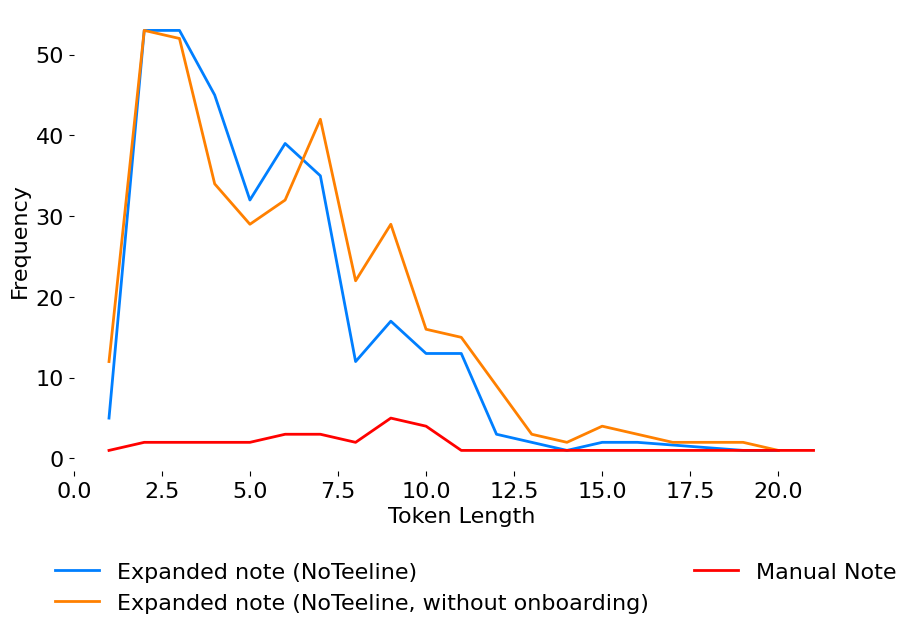

In [37]:
author = 1

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


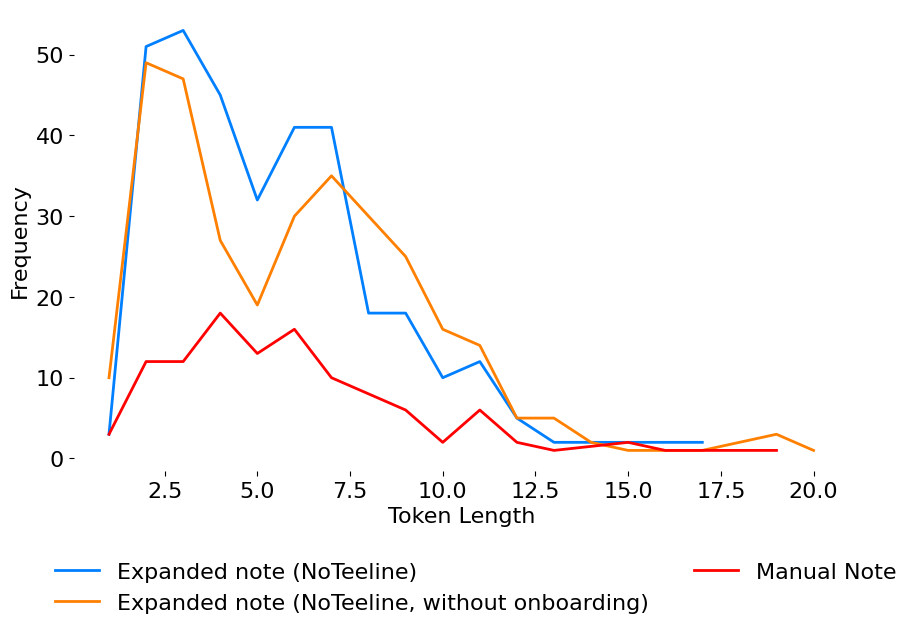

In [36]:
author = 2

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


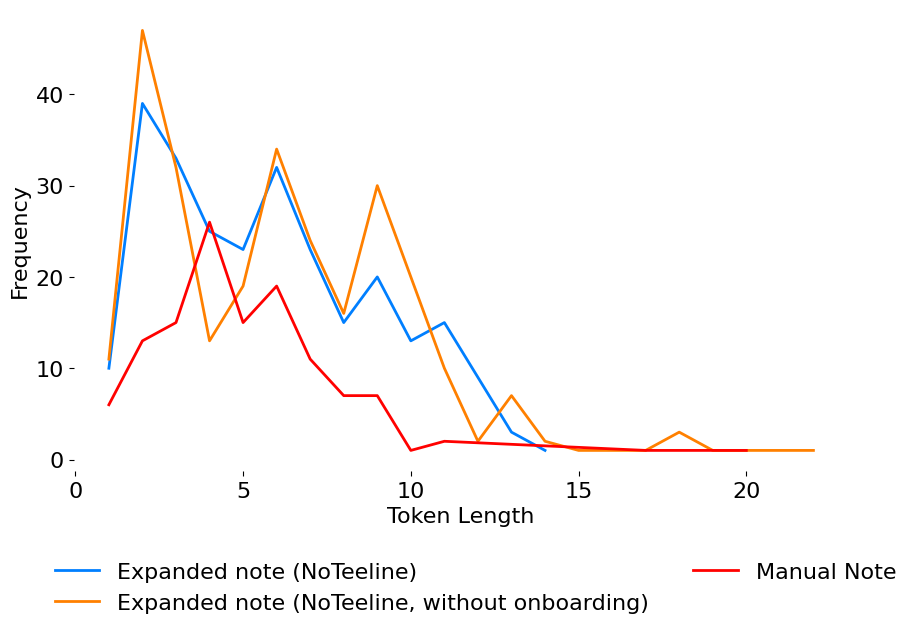

In [35]:
author = 3

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


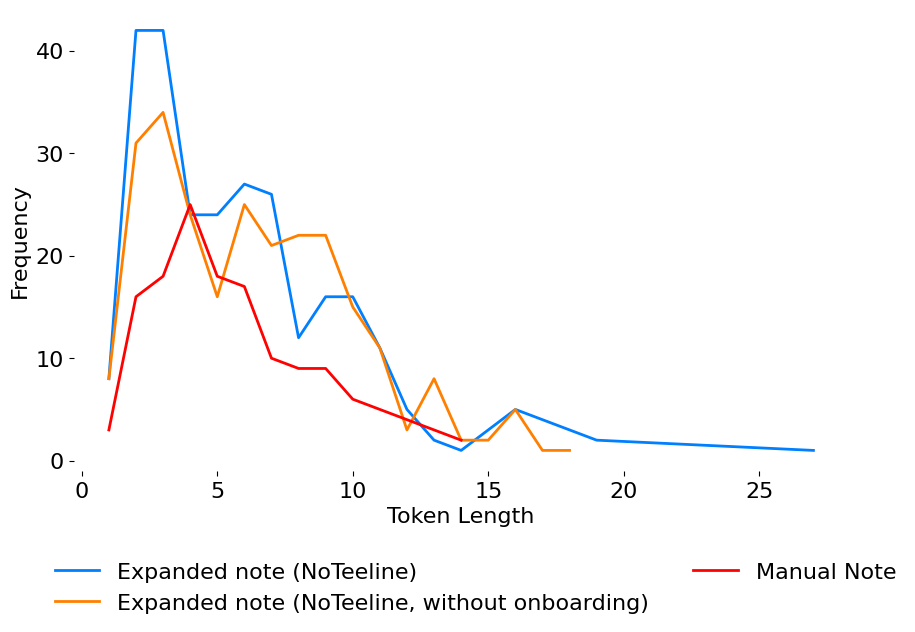

In [38]:
author = 4

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


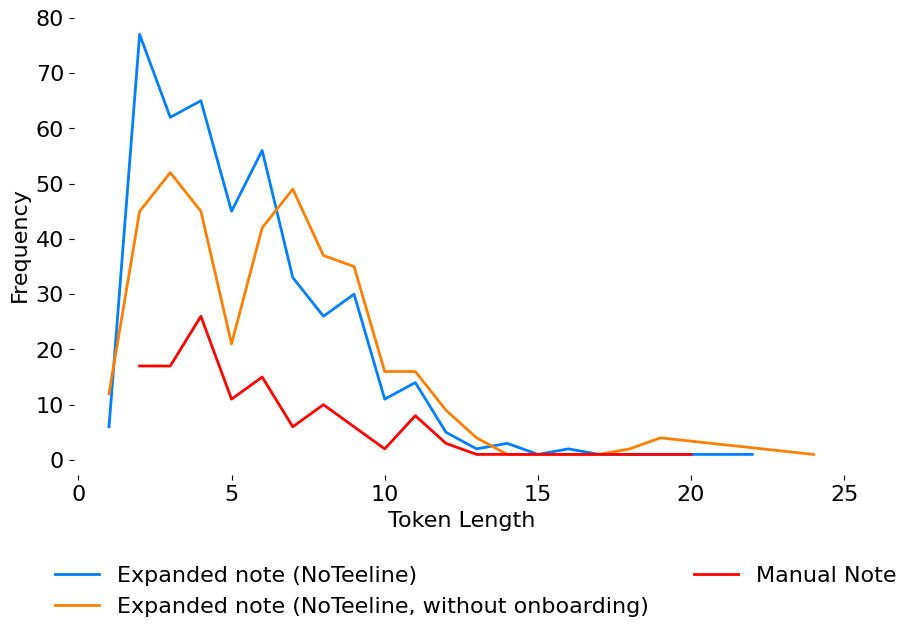

In [39]:
author = 5

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


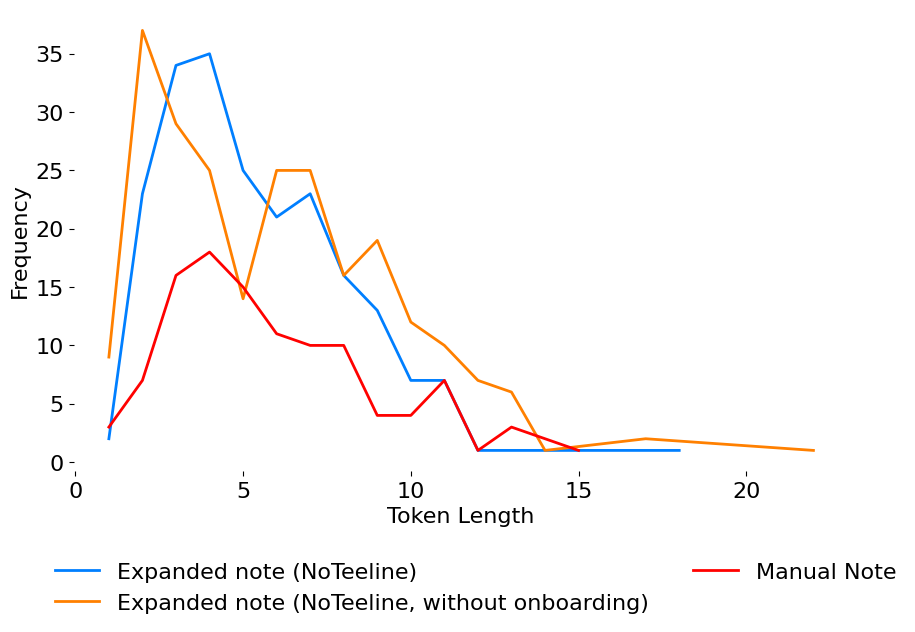

In [40]:
author = 6

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


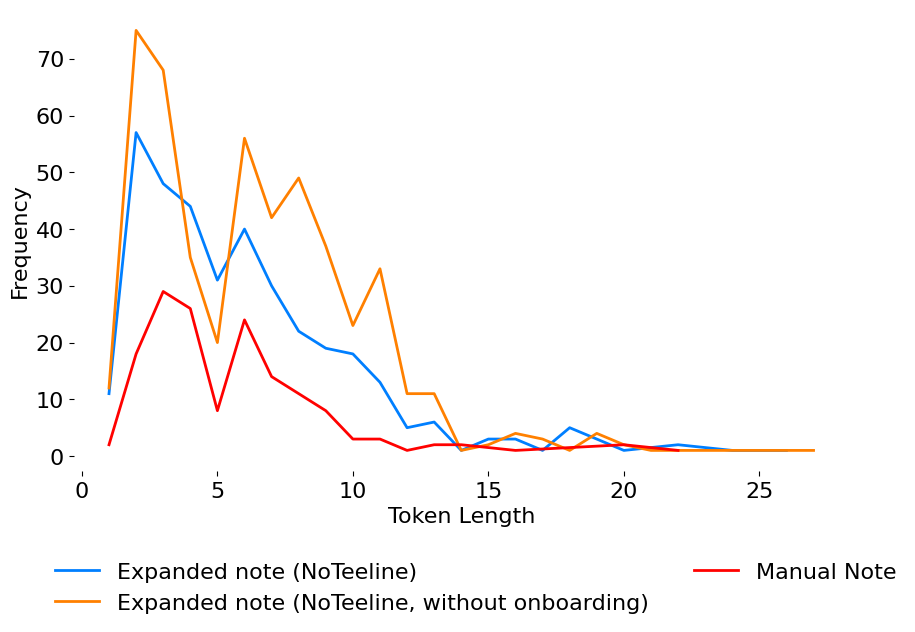

In [41]:
author = 8

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


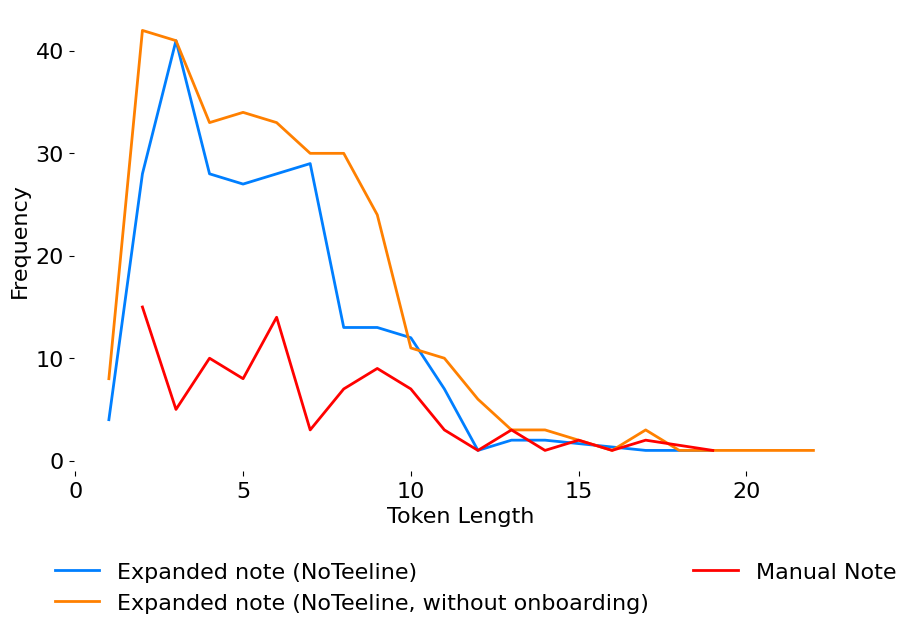

In [42]:
author = 9

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


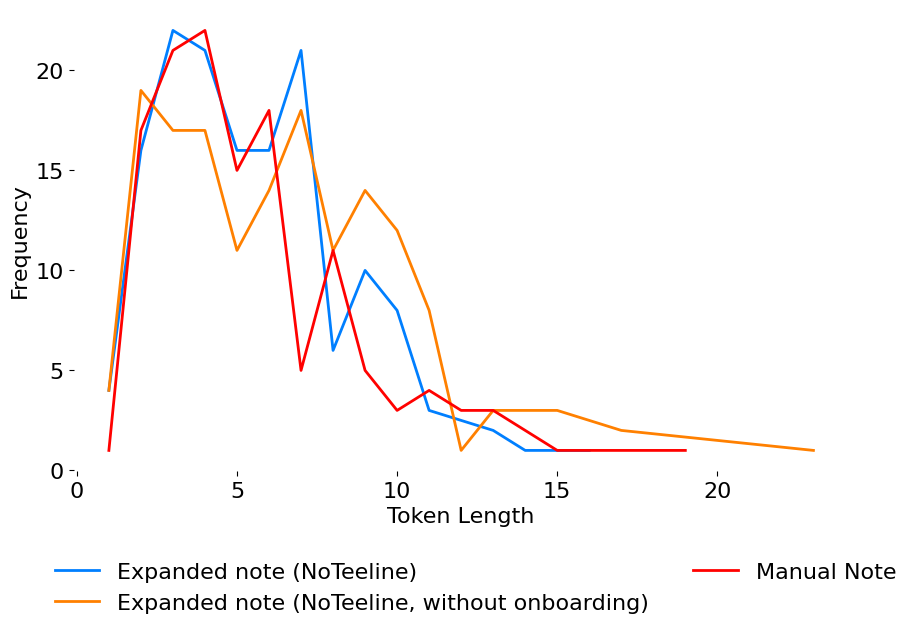

In [43]:
author = 10

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


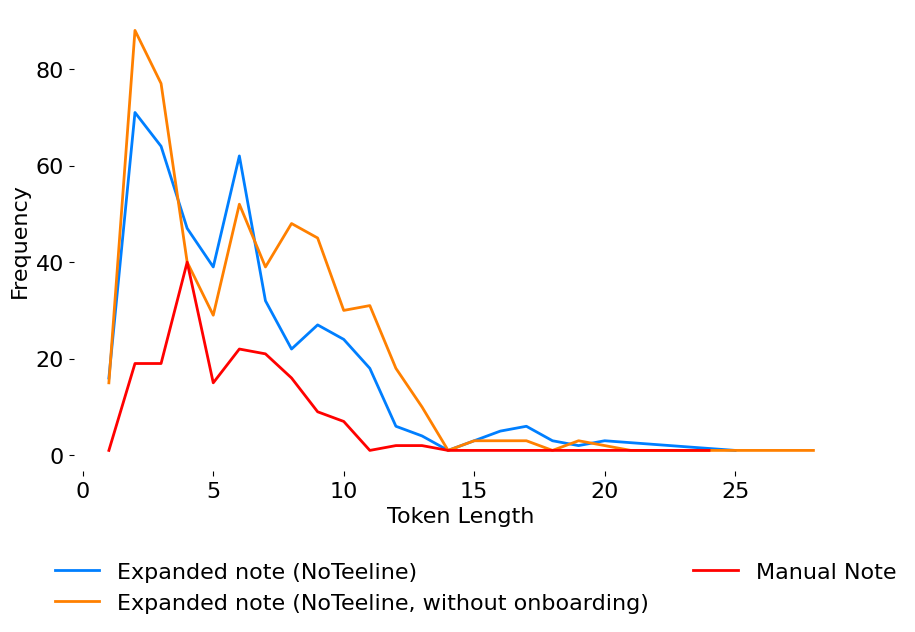

In [44]:
author = 11

plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(author_notee[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig(f'UserLog/mcurves/mcurve_p{author+1}.pdf', bbox_inches="tight")
plt.show()